In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn import linear_model, preprocessing 
import warnings

In [2]:
survey = pd.read_csv('/Users/danielle.arneson/Desktop/survey0921.csv')
clients = pd.read_csv('/Users/danielle.arneson/Desktop/clients.csv')
programs = pd.read_csv('/Users/danielle.arneson/Desktop/goals2021.csv')

In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User Progress Id              7666 non-null   int64  
 1   Survey Id                     7666 non-null   int64  
 2   Survey Title                  7666 non-null   object 
 3   Language                      0 non-null      float64
 4   Mode                          7074 non-null   object 
 5   Wave Start Date               7666 non-null   object 
 6   Wave End Date                 7666 non-null   object 
 7   Status                        7666 non-null   object 
 8   Participant Id                0 non-null      float64
 9   Publish Id                    7666 non-null   int64  
 10  Instance                      7666 non-null   int64  
 11  User Id                       7666 non-null   int64  
 12  Contact Id                    7666 non-null   object 
 13  Ext

In [4]:
survey.head(10)

,User Progress Id,Survey Id,Survey Title,Language,Mode,Wave Start Date,Wave End Date,Status,Participant Id,Publish Id,...,Employer Id,Start Date Time Stamp,End Date Time Stamp,CoachingConfidence,CoachingMotivation,CMLFlourishOverallSatisfied,CMLFlourishHappy,CoachingHabitsGoalsAlignment,CoachingSatisfaction,CoachingFeedback
0,3021429,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,100845,2021-01-28 19:22:12,2021-01-28 21:24:49,10.0,10.0,5.0,5.0,Neutral,Very Satisfied,NaN
1,3021716,1616,1:1 Coaching survey,NaN,NaN,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,NaN,2021-01-28 19:57:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3021859,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,Strongly Agree,Very Satisfied,Helpful and pleasant. Meets me where I am to ...
3,3021984,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,Agree,Satisfied,No Thank you
4,3022251,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach has help me build my confidence in ac...
5,3022282,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,Strongly Agree,Very Satisfied,My coach is very knowledgeable about health is...
6,3022315,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Incomplete,NaN,1616,...,100845,2021-01-28 21:24:53,NaN,5.0,5.0,5.0,6.0,Agree,Neutral,NaN
7,3022444,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,Agree,Satisfied,No
8,3022571,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,Neutral,Satisfied,NaN
9,3022663,1616,1:1 Coaching survey,NaN,WEB,2021-01-28 08:00:00,2051-01-28 08:00:00,Completed,NaN,1616,...,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,Agree,Satisfied,"no, thank you!"


In [5]:
#data cleaning 
survey.columns = survey.columns.str.lower()
survey.columns = survey.columns.str.replace(" ","_")
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.lower()
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.lower()
survey['coachinghabitsgoalsalignment'] = survey['coachinghabitsgoalsalignment'].str.replace(" ","_")
survey['coachingsatisfaction'] = survey['coachingsatisfaction'].str.replace(" ", "_")
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_progress_id              7666 non-null   int64  
 1   survey_id                     7666 non-null   int64  
 2   survey_title                  7666 non-null   object 
 3   language                      0 non-null      float64
 4   mode                          7074 non-null   object 
 5   wave_start_date               7666 non-null   object 
 6   wave_end_date                 7666 non-null   object 
 7   status                        7666 non-null   object 
 8   participant_id                0 non-null      float64
 9   publish_id                    7666 non-null   int64  
 10  instance                      7666 non-null   int64  
 11  user_id                       7666 non-null   int64  
 12  contact_id                    7666 non-null   object 
 13  ext

In [6]:
survey = survey.drop(columns =['language', 'participant_id', 'wave_start_date', 'wave_end_date', 'mode', 'instance','user_id','user_progress_id']) #remove columns that aren't useful
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     7666 non-null   int64  
 1   survey_title                  7666 non-null   object 
 2   status                        7666 non-null   object 
 3   publish_id                    7666 non-null   int64  
 4   contact_id                    7666 non-null   object 
 5   external_participant_id       7655 non-null   object 
 6   employer_id                   1565 non-null   object 
 7   start_date_time_stamp         7666 non-null   object 
 8   end_date_time_stamp           7043 non-null   object 
 9   coachingconfidence            7074 non-null   float64
 10  coachingmotivation            7065 non-null   float64
 11  cmlflourishoverallsatisfied   7062 non-null   float64
 12  cmlflourishhappy              7061 non-null   float64
 13  coa

In [7]:
survey['status'].unique()

array(['Completed', 'Incomplete'], dtype=object)

In [8]:
survey = survey.drop(survey[survey.status == 'Incomplete'].index) #removed all incomplete surveys 

In [9]:
survey['status'].replace('Completed','1',inplace=True)#changed all completed surveys to 1

In [10]:
survey['status'] = survey['status'].astype(str).astype(int)

In [11]:
survey['status'].unique()

array([1])

In [12]:
survey = survey[(~survey['contact_id'].str.contains('test'))] #dropping all test contacts 

In [13]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 2 to 7665
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   survey_id                     7042 non-null   int64  
 1   survey_title                  7042 non-null   object 
 2   status                        7042 non-null   int64  
 3   publish_id                    7042 non-null   int64  
 4   contact_id                    7042 non-null   object 
 5   external_participant_id       7033 non-null   object 
 6   employer_id                   1560 non-null   object 
 7   start_date_time_stamp         7042 non-null   object 
 8   end_date_time_stamp           7042 non-null   object 
 9   coachingconfidence            7042 non-null   float64
 10  coachingmotivation            7042 non-null   float64
 11  cmlflourishoverallsatisfied   7042 non-null   float64
 12  cmlflourishhappy              7042 non-null   float64
 13  coa

In [14]:
survey.head(10)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No
8,1616,1:1 Coaching survey,1,1616,0035Y00003kT5WzQAK,27fd15b6-e0ff-410e-a470-7cb65699865e,106914,2021-01-28 22:11:28,2021-01-28 22:12:27,6.0,7.0,4.0,3.0,neutral,satisfied,NaN
9,1616,1:1 Coaching survey,1,1616,0035Y00003kScSsQAK,3e09e650-6de1-4373-8d56-dd9c60339c8d,CCHMC,2021-01-28 22:29:21,2021-01-28 22:30:13,9.0,8.0,8.0,8.0,agree,satisfied,"no, thank you!"
10,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-28 23:34:53,2021-01-29 00:06:30,10.0,10.0,9.0,10.0,agree,very_satisfied,Looking forward to the sessions and what we ca...
11,1616,1:1 Coaching survey,1,1616,0031O00003Yat8LQAR,5e3cc42f-a6b2-79bd-0be1-38cb2e30a498,dawn_food_products,2021-01-28 23:53:22,2021-01-28 23:54:37,7.0,7.0,6.0,4.0,neutral,very_satisfied,NaN
12,1616,1:1 Coaching survey,1,1616,0033900002PojClAAJ,fe61af23-c451-4220-a884-7b2b6d7d96f2,Vericast,2021-01-29 00:06:41,2021-01-29 00:09:57,10.0,10.0,9.0,10.0,agree,very_satisfied,NaN


In [15]:
survey['publish_id'].unique() #checking to make sure all survey data collected is for the 1:1 survey 

array([1616])

In [16]:
survey['confidencedifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingconfidence'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,NaN
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,1616,1:1 Coaching survey,1,1616,0035Y00003kTyTkQAK,01756b67-713d-41e2-8224-744fbcd25135,NaN,2021-09-09 16:32:47,2021-09-09 16:33:50,10.0,8.0,9.0,9.0,strongly_agree,very_satisfied,NaN,0.0
7662,1616,1:1 Coaching survey,1,1616,0033900002CRTAjAAP,2b79f018-3bf8-4489-99c6-5df069b3c169,NaN,2021-09-09 16:35:45,2021-09-09 16:36:26,8.0,8.0,7.0,8.0,strongly_agree,satisfied,NaN,NaN
7663,1616,1:1 Coaching survey,1,1616,0035Y000040RvAdQAK,c7d75287-ea4a-4e05-afb5-132e66a1095f,NaN,2021-09-09 16:58:36,2021-09-09 16:59:16,9.0,10.0,10.0,9.0,strongly_agree,very_satisfied,NaN,1.0
7664,1616,1:1 Coaching survey,1,1616,0035Y000043ImaxQAC,4b67b842-7fcb-4b65-8d8a-a02adef56e6a,NaN,2021-09-09 17:18:55,2021-09-09 17:19:53,8.0,6.0,1.0,2.0,neutral,satisfied,NaN,NaN


In [17]:
survey['confidencedifference'].mean()

-0.0009416195856873823

In [18]:
survey['motivationdifference']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingmotivation'].diff()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,NaN,NaN
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,1616,1:1 Coaching survey,1,1616,0035Y00003kTyTkQAK,01756b67-713d-41e2-8224-744fbcd25135,NaN,2021-09-09 16:32:47,2021-09-09 16:33:50,10.0,8.0,9.0,9.0,strongly_agree,very_satisfied,NaN,0.0,-2.0
7662,1616,1:1 Coaching survey,1,1616,0033900002CRTAjAAP,2b79f018-3bf8-4489-99c6-5df069b3c169,NaN,2021-09-09 16:35:45,2021-09-09 16:36:26,8.0,8.0,7.0,8.0,strongly_agree,satisfied,NaN,NaN,NaN
7663,1616,1:1 Coaching survey,1,1616,0035Y000040RvAdQAK,c7d75287-ea4a-4e05-afb5-132e66a1095f,NaN,2021-09-09 16:58:36,2021-09-09 16:59:16,9.0,10.0,10.0,9.0,strongly_agree,very_satisfied,NaN,1.0,3.0
7664,1616,1:1 Coaching survey,1,1616,0035Y000043ImaxQAC,4b67b842-7fcb-4b65-8d8a-a02adef56e6a,NaN,2021-09-09 17:18:55,2021-09-09 17:19:53,8.0,6.0,1.0,2.0,neutral,satisfied,NaN,NaN,NaN


In [173]:
survey['motivationaverage']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingmotivation'].mean()
survey['confidenceaverage']=survey.sort_values('external_participant_id').groupby('external_participant_id')['coachingconfidence'].mean()
survey

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,lastconfidence,lastmotivation,completion_time,motivationaverage,confidenceaverage
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,8.0,8.0,00:02:18,NaN,NaN
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,...,agree,satisfied,No Thank you,NaN,NaN,8.0,8.0,00:00:33,NaN,NaN
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,...,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,10.0,10.0,00:03:57,NaN,NaN
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,...,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,10.0,10.0,00:05:46,NaN,NaN
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,...,agree,satisfied,No,-1.0,0.0,8.0,10.0,00:00:36,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,1616,1:1 Coaching survey,1,1616,0035Y00003kTyTkQAK,01756b67-713d-41e2-8224-744fbcd25135,NaN,2021-09-09 16:32:47,2021-09-09 16:33:50,10.0,...,strongly_agree,very_satisfied,NaN,0.0,-2.0,10.0,8.0,00:01:03,NaN,NaN
7662,1616,1:1 Coaching survey,1,1616,0033900002CRTAjAAP,2b79f018-3bf8-4489-99c6-5df069b3c169,NaN,2021-09-09 16:35:45,2021-09-09 16:36:26,8.0,...,strongly_agree,satisfied,NaN,NaN,NaN,8.0,8.0,00:00:41,NaN,NaN
7663,1616,1:1 Coaching survey,1,1616,0035Y000040RvAdQAK,c7d75287-ea4a-4e05-afb5-132e66a1095f,NaN,2021-09-09 16:58:36,2021-09-09 16:59:16,9.0,...,strongly_agree,very_satisfied,NaN,1.0,3.0,9.0,10.0,00:00:40,NaN,NaN
7664,1616,1:1 Coaching survey,1,1616,0035Y000043ImaxQAC,4b67b842-7fcb-4b65-8d8a-a02adef56e6a,NaN,2021-09-09 17:18:55,2021-09-09 17:19:53,8.0,...,neutral,satisfied,NaN,NaN,NaN,8.0,6.0,00:00:58,NaN,NaN


In [19]:
survey['motivationdifference'].mean()

-0.010546139359698682

In [174]:
survey['status'].unique()

array([1])

In [20]:
#checking the first and last submitted survey difference 
survey2 = survey['coachingconfidence'].groupby(level=0).agg(['first', 'last']).stack().diff()
survey2.head()

2  first    NaN
   last     0.0
3  first    0.0
   last     0.0
4  first    2.0
dtype: float64

In [21]:
#first and last submitted diff mean
survey2.mean()

0.00014201519562593199

In [22]:
survey['lastconfidence'] = survey['coachingconfidence'].groupby(level=0).agg('last')
survey['lastmotivation'] = survey['coachingmotivation'].groupby(level=0).agg('last')
survey.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,lastconfidence,lastmotivation
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,8.0,8.0
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,NaN,NaN,8.0,8.0
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,10.0,10.0
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,10.0,10.0
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0,0.0,8.0,10.0


In [23]:
survey['employer_id'].unique()

array(['CCHMC', 'TeamHealth', 'allegion', '108854', '106914', 'Vericast',
       'dawn_food_products', 'Sprouts', '107382', 'assurant', '106840',
       'mccain_foods_usa', '6fdcac65-c386-499d-a7b8-3bc8c1b6f9ca', 'APS',
       '108177', '108199', '108540', 'AmericanAirlines', 'StrykerStrive',
       '6b6f26df-eaec-453f-b391-fe8621faec28', '107144', 'PSE', 'ABB',
       '106043', '107736', 'AllyFinancial', '107387', 'honda', 'UNC-HCS',
       'Kindred', 'KindredAtHome', 'd0dce4a6-6059-498e-b235-e6052231942a',
       '107771', '473ff432-4afd-48fa-ab94-da73543b6b0b', 'maximus_inc',
       'Bayer', 'NorthwesternMutual', 'boardofpensions',
       'association_of_washington_cities', '106960',
       'c97c6d49-f047-49b1-a3a4-f04a08d5a492',
       '5ecba2bc-c88b-4beb-a767-a053e9480b98', '107386', '109000',
       '106682', 'synopsys', '108880', '107244',
       'ad1d7260-2c17-4409-946f-25adacaab544', 'Mallinckrodt',
       'UnitedBioSource', 'c9c967ec-0304-4c49-946e-a7df431d5223',
       '1071

In [24]:
survey[['start_date_time_stamp', 'end_date_time_stamp']].describe()

,start_date_time_stamp,end_date_time_stamp
count,7042,7042
unique,7037,7038
top,2021-04-07 17:37:23,2021-08-31 15:35:12
freq,2,2


In [25]:
survey['start_date_time_stamp'] = pd.to_datetime(survey['start_date_time_stamp'])

In [26]:
survey['end_date_time_stamp'] = pd.to_datetime(survey['end_date_time_stamp'])

In [27]:
survey['completion_time'] = survey['end_date_time_stamp'] - survey['start_date_time_stamp']

In [28]:
survey.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,lastconfidence,lastmotivation,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,8.0,8.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,...,8.0,8.0,agree,satisfied,No Thank you,NaN,NaN,8.0,8.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,...,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,10.0,10.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,...,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,10.0,10.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,...,9.0,9.0,agree,satisfied,No,-1.0,0.0,8.0,10.0,00:00:36


In [29]:
survey['completion_time'].mean() #average duration to complete survey

Timedelta('0 days 04:06:00.916785')

In [30]:
survey['completion_time'].max() #longest duration to complete survey

Timedelta('131 days 23:53:29')

In [31]:
survey['completion_time'].min()# shortest duration to complete survey

Timedelta('0 days 00:00:14')

In [32]:
survey['coachingconfidence'].unique()

array([ 8., 10.,  6.,  9.,  7.,  4.,  5.,  3.,  2.,  1.])

In [33]:
survey['coachingconfidence'].value_counts()

10.0    2538
9.0     1836
8.0     1533
7.0      683
6.0      242
5.0      174
4.0       20
3.0        8
2.0        5
1.0        3
Name: coachingconfidence, dtype: int64

In [34]:
survey['coachingconfidence'].describe()

count    7042.000000
mean        8.717410
std         1.328548
min         1.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingconfidence, dtype: float64

In [35]:
survey['coachingmotivation'].unique()

array([ 8., 10.,  7.,  9.,  5.,  6.,  4.,  3.,  2.,  1.])

In [36]:
survey['coachingmotivation'].value_counts()

10.0    2985
9.0     1810
8.0     1306
7.0      562
6.0      217
5.0      136
4.0       12
3.0        9
2.0        3
1.0        2
Name: coachingmotivation, dtype: int64

In [37]:
survey['coachingmotivation'].describe()

count    7042.000000
mean        8.887674
std         1.276788
min         1.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        10.000000
Name: coachingmotivation, dtype: float64

In [38]:
survey['coachinghabitsgoalsalignment'].unique()

array(['strongly_agree', 'agree', 'neutral', 'strongly_disagree',
       'disagree'], dtype=object)

In [39]:
survey['coachinghabitsgoalsalignment'].describe()

count      7042
unique        5
top       agree
freq       3733
Name: coachinghabitsgoalsalignment, dtype: object

In [40]:
survey['cmlflourishoverallsatisfied'].describe()

count    7042.000000
mean        8.256745
std         1.572099
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: cmlflourishoverallsatisfied, dtype: float64

In [41]:
survey['cmlflourishoverallsatisfied'].value_counts()

8.0     1755
10.0    1752
9.0     1723
7.0      941
6.0      445
5.0      253
4.0       83
3.0       59
2.0       20
1.0        6
0.0        5
Name: cmlflourishoverallsatisfied, dtype: int64

In [42]:
survey['cmlflourishhappy'].value_counts()

8.0     1928
9.0     1494
10.0    1370
7.0     1081
6.0      534
5.0      400
4.0      123
3.0       57
2.0       27
1.0       17
0.0       11
Name: cmlflourishhappy, dtype: int64

In [160]:
survey['cmlflourishhappy'].describe()

count    7042.000000
mean        7.962937
std         1.671984
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: cmlflourishhappy, dtype: float64

In [43]:
Habits = survey[(survey['coachinghabitsgoalsalignment'].str.contains('disagree'))]

In [44]:
Habits.head(20)

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,lastconfidence,lastmotivation,completion_time
41,1616,1:1 Coaching survey,1,1616,00339000027ctYkAAI,42e252a0-53c7-4f89-9c6a-29cbfbab51eb,ABB,2021-01-29 23:05:39,2021-01-29 23:07:07,10.0,...,10.0,10.0,strongly_disagree,very_satisfied,None,NaN,NaN,10.0,10.0,0 days 00:01:28
46,1616,1:1 Coaching survey,1,1616,0037000001kLLFEAA4,31855b43-5c29-4365-84df-07734da5557c,107387,2021-01-30 00:37:56,2021-01-30 00:38:32,10.0,...,10.0,10.0,strongly_disagree,very_satisfied,NaN,0.0,0.0,10.0,10.0,0 days 00:00:36
62,1616,1:1 Coaching survey,1,1616,0035Y00003kUqITQA0,c1b8035d-a394-454b-a65a-0e560aed5766,maximus_inc,2021-02-01 17:04:48,2021-02-01 17:05:49,9.0,...,8.0,7.0,disagree,very_satisfied,Not at this time.,0.0,2.0,9.0,10.0,0 days 00:01:01
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,...,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,10.0,10.0,0 days 00:01:21
80,1616,1:1 Coaching survey,1,1616,0035Y00003kUoDUQA0,0a18f4db-06f6-658b-8f4d-8751787955e3,allegion,2021-02-01 22:56:22,2021-02-01 22:57:58,7.0,...,8.0,8.0,disagree,very_satisfied,NaN,NaN,NaN,7.0,9.0,0 days 00:01:36
82,1616,1:1 Coaching survey,1,1616,0031O00003Yb7jUQAR,b1bbe49f-ac22-41cc-8f8b-2eff652a0b6d,107382,2021-02-01 23:20:16,2021-02-01 23:23:08,10.0,...,9.0,9.0,disagree,very_satisfied,Very positive experience. I look forward to ou...,0.0,0.0,10.0,10.0,0 days 00:02:52
89,1616,1:1 Coaching survey,1,1616,0035Y00003kUoe0QAC,f59330ed-1218-47c4-b5a9-6bd8b29b5a0f,maximus_inc,2021-02-02 03:23:32,2021-02-02 03:24:50,10.0,...,6.0,5.0,disagree,very_satisfied,NaN,NaN,NaN,10.0,8.0,0 days 00:01:18
98,1616,1:1 Coaching survey,1,1616,0035Y00003kUFBpQAO,6d7d3012-593c-42c6-8d44-1eed3cde1b59,d0dce4a6-6059-498e-b235-e6052231942a,2021-02-02 15:37:45,2021-02-02 15:39:50,9.0,...,7.0,9.0,disagree,very_satisfied,looking forward to be held accountable to my a...,1.0,0.0,9.0,9.0,0 days 00:02:05
133,1616,1:1 Coaching survey,1,1616,0035Y00003kTxjIQAS,046ef8a0-b06e-4035-b4ca-f04f7f584fdf,PSE,2021-02-02 21:05:38,2021-02-02 21:06:04,10.0,...,3.0,3.0,disagree,satisfied,NaN,4.0,-2.0,10.0,6.0,0 days 00:00:26
170,1616,1:1 Coaching survey,1,1616,0031O00003cFlaVQAS,5c25eb35-b52e-4c45-8d65-05b0c9a56d86,109000,2021-02-03 18:53:54,2021-02-03 18:55:39,10.0,...,6.0,6.0,disagree,very_satisfied,Already I see that this will be helpful.,2.0,3.0,10.0,10.0,0 days 00:01:45


In [45]:
Habits.info() # number of surveys that have disagree or strongly disagree with habit and goal alignment 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 41 to 7648
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     380 non-null    int64          
 1   survey_title                  380 non-null    object         
 2   status                        380 non-null    int64          
 3   publish_id                    380 non-null    int64          
 4   contact_id                    380 non-null    object         
 5   external_participant_id       378 non-null    object         
 6   employer_id                   85 non-null     object         
 7   start_date_time_stamp         380 non-null    datetime64[ns] 
 8   end_date_time_stamp           380 non-null    datetime64[ns] 
 9   coachingconfidence            380 non-null    float64        
 10  coachingmotivation            380 non-null    float64        
 11  cmlflourishoveral

In [46]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [47]:
survey.dropna(subset = ["cmlflourishhappy"])

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,lastconfidence,lastmotivation,completion_time
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,8.0,8.0,00:02:18
3,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,...,8.0,8.0,agree,satisfied,No Thank you,NaN,NaN,8.0,8.0,00:00:33
4,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,...,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,10.0,10.0,00:03:57
5,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,8447d938-b5c9-e4eb-af4c-edb4836f8c26,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,...,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,10.0,10.0,00:05:46
7,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,e3844d06-05e4-410d-8aee-8c44553ec5ae,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,...,9.0,9.0,agree,satisfied,No,-1.0,0.0,8.0,10.0,00:00:36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,1616,1:1 Coaching survey,1,1616,0035Y00003kTyTkQAK,01756b67-713d-41e2-8224-744fbcd25135,NaN,2021-09-09 16:32:47,2021-09-09 16:33:50,10.0,...,9.0,9.0,strongly_agree,very_satisfied,NaN,0.0,-2.0,10.0,8.0,00:01:03
7662,1616,1:1 Coaching survey,1,1616,0033900002CRTAjAAP,2b79f018-3bf8-4489-99c6-5df069b3c169,NaN,2021-09-09 16:35:45,2021-09-09 16:36:26,8.0,...,7.0,8.0,strongly_agree,satisfied,NaN,NaN,NaN,8.0,8.0,00:00:41
7663,1616,1:1 Coaching survey,1,1616,0035Y000040RvAdQAK,c7d75287-ea4a-4e05-afb5-132e66a1095f,NaN,2021-09-09 16:58:36,2021-09-09 16:59:16,9.0,...,10.0,9.0,strongly_agree,very_satisfied,NaN,1.0,3.0,9.0,10.0,00:00:40
7664,1616,1:1 Coaching survey,1,1616,0035Y000043ImaxQAC,4b67b842-7fcb-4b65-8d8a-a02adef56e6a,NaN,2021-09-09 17:18:55,2021-09-09 17:19:53,8.0,...,1.0,2.0,neutral,satisfied,NaN,NaN,NaN,8.0,6.0,00:00:58


In [48]:
survey['cmlflourishhappy'].unique()

array([ 8., 10.,  9.,  3.,  4.,  7.,  6.,  5.,  0.,  1.,  2.])

In [49]:
survey['cmlflourishhappy'].describe()

count    7042.000000
mean        7.962937
std         1.671984
min         0.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: cmlflourishhappy, dtype: float64

In [50]:
happy = survey[survey['cmlflourishhappy']<2.0]

In [51]:
happy.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,lastconfidence,lastmotivation,completion_time
39,1616,1:1 Coaching survey,1,1616,0033900002KGbPAAA1,0d6b9602-ca31-44ca-af62-33810ef81831,assurant,2021-01-29 22:38:23,2021-01-29 22:39:18,10.0,...,9.0,0.0,strongly_agree,very_satisfied,No. Jackson is a great fit as a coach.,0.0,0.0,10.0,10.0,00:00:55
78,1616,1:1 Coaching survey,1,1616,0031O00003YYurCQAT,0c4780ed-7552-49ee-9e9d-10c3583dbb23,NorthwesternMutual,2021-02-01 22:00:52,2021-02-01 22:02:13,10.0,...,2.0,1.0,strongly_disagree,very_satisfied,NaN,NaN,NaN,10.0,10.0,00:01:21
238,1616,1:1 Coaching survey,1,1616,0033900002KDmWiAAL,de88fe49-ddb0-44f1-9a95-7e321bf6a1aa,108199,2021-02-05 01:18:13,2021-02-05 01:19:14,9.0,...,9.0,1.0,strongly_agree,very_satisfied,I appreciate the accountability!!,2.0,2.0,9.0,9.0,00:01:01
545,1616,1:1 Coaching survey,1,1616,0031O00003etAxEQAU,9abf6775-6982-49da-a2ac-ef771da6be55,Mallinckrodt,2021-02-12 20:08:01,2021-02-12 20:09:54,9.0,...,1.0,1.0,neutral,satisfied,The talk is too short.,1.0,1.0,9.0,9.0,00:01:53
575,1616,1:1 Coaching survey,1,1616,0033900002Qqpy0AAB,687a88ee-09ab-486e-951e-7691ec5ae8b1,108540,2021-02-15 13:57:19,2021-02-15 13:58:40,8.0,...,2.0,1.0,disagree,very_satisfied,NaN,NaN,NaN,8.0,9.0,00:01:21


In [52]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 39 to 7179
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     28 non-null     int64          
 1   survey_title                  28 non-null     object         
 2   status                        28 non-null     int64          
 3   publish_id                    28 non-null     int64          
 4   contact_id                    28 non-null     object         
 5   external_participant_id       28 non-null     object         
 6   employer_id                   6 non-null      object         
 7   start_date_time_stamp         28 non-null     datetime64[ns] 
 8   end_date_time_stamp           28 non-null     datetime64[ns] 
 9   coachingconfidence            28 non-null     float64        
 10  coachingmotivation            28 non-null     float64        
 11  cmlflourishoverall

In [53]:
survey['coachingconfidence'].corr(survey['coachingmotivation'])

0.7309830448895672

In [54]:
survey['coachingconfidence'].corr(survey['cmlflourishhappy'])

0.4936138621174999

In [55]:
survey['coachingmotivation'].corr(survey['cmlflourishhappy'])

0.4642223347852163

In [168]:
grouped = survey.set_index('external_participant_id')
grouped.head()

,survey_id,survey_title,status,publish_id,contact_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,coachinghabitsgoalsalignment,coachingsatisfaction,coachingfeedback,confidencedifference,motivationdifference,lastconfidence,lastmotivation,completion_time
external_participant_id,,,,,,,,,,,,,,,,,,,,
b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,8.0,8.0,8.0,strongly_agree,very_satisfied,Helpful and pleasant. Meets me where I am to ...,1.0,0.0,8.0,8.0,00:02:18
5ab06efa-b338-4d6e-b67c-3d7db0a6b0b4,1616,1:1 Coaching survey,1,1616,0031O00003TZE7oQAH,TeamHealth,2021-01-28 20:34:25,2021-01-28 20:34:58,8.0,8.0,8.0,8.0,agree,satisfied,No Thank you,NaN,NaN,8.0,8.0,00:00:33
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:16:37,2021-01-28 21:20:34,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach has help me build my confidence in ac...,0.0,0.0,10.0,10.0,00:03:57
8447d938-b5c9-e4eb-af4c-edb4836f8c26,1616,1:1 Coaching survey,1,1616,0035Y00003kTjzeQAC,allegion,2021-01-28 21:21:06,2021-01-28 21:26:52,10.0,10.0,10.0,10.0,strongly_agree,very_satisfied,My coach is very knowledgeable about health is...,0.0,0.0,10.0,10.0,00:05:46
e3844d06-05e4-410d-8aee-8c44553ec5ae,1616,1:1 Coaching survey,1,1616,0031O00003X46YAQAZ,108854,2021-01-28 21:44:39,2021-01-28 21:45:15,8.0,10.0,9.0,9.0,agree,satisfied,No,-1.0,0.0,8.0,10.0,00:00:36


In [170]:
grouped = grouped.groupby('external_participant_id')['coachingconfidence'].agg(sum_Status=pd.NamedAgg(column='status', aggfunc=sum))


In [58]:
grouped

,sum_Status
external_participant_id,
0013f224-1db1-4a11-a18b-ccdfd038421b,8
006e3853-dae4-4e35-8fca-77f901d30fe8,1
011e4f26-94c2-415b-8022-e8c87d1d49c4,5
014b1b7f-04f7-414b-8779-3b4bd2d5af4a,1
01756b67-713d-41e2-8224-744fbcd25135,4
...,...
ff3eac63-0716-4f7e-9958-e6d9a19e30a2,4
ff483ff2-0a75-44e0-8f04-80936154af1f,2
ff93ece8-7cc8-444d-b08c-075fc2b491ab,6


In [179]:
grouped['sum_Status'].value_counts()

10.0     164
9.0       96
8.0       92
20.0      68
50.0      47
        ... 
84.0       1
240.0      1
122.0      1
114.0      1
199.0      1
Name: sum_Status, Length: 121, dtype: int64

In [175]:
high_engagment = grouped[grouped['sum_Status']> 3]
high_engagment

,sum_Status
external_participant_id,
0013f224-1db1-4a11-a18b-ccdfd038421b,80.0
006e3853-dae4-4e35-8fca-77f901d30fe8,9.0
011e4f26-94c2-415b-8022-e8c87d1d49c4,44.0
014b1b7f-04f7-414b-8779-3b4bd2d5af4a,6.0
01756b67-713d-41e2-8224-744fbcd25135,40.0
...,...
ff3eac63-0716-4f7e-9958-e6d9a19e30a2,39.0
ff483ff2-0a75-44e0-8f04-80936154af1f,20.0
ff93ece8-7cc8-444d-b08c-075fc2b491ab,49.0


In [59]:
grouped.mean() #average number of completed surveys per memmber

sum_Status    4.081834
dtype: float64

In [ ]:
high_grouped = 

In [60]:
small_survey = survey[['coachingconfidence', 'coachingmotivation', 'cmlflourishhappy', 'cmlflourishoverallsatisfied']]

In [61]:
small_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 2 to 7665
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   coachingconfidence           7042 non-null   float64
 1   coachingmotivation           7042 non-null   float64
 2   cmlflourishhappy             7042 non-null   float64
 3   cmlflourishoverallsatisfied  7042 non-null   float64
dtypes: float64(4)
memory usage: 595.1 KB


In [62]:
small_survey.corr()

,coachingconfidence,coachingmotivation,cmlflourishhappy,cmlflourishoverallsatisfied
coachingconfidence,1.000000,0.730983,0.493614,0.577654
coachingmotivation,0.730983,1.000000,0.464222,0.526789
cmlflourishhappy,0.493614,0.464222,1.000000,0.789089
cmlflourishoverallsatisfied,0.577654,0.526789,0.789089,1.000000


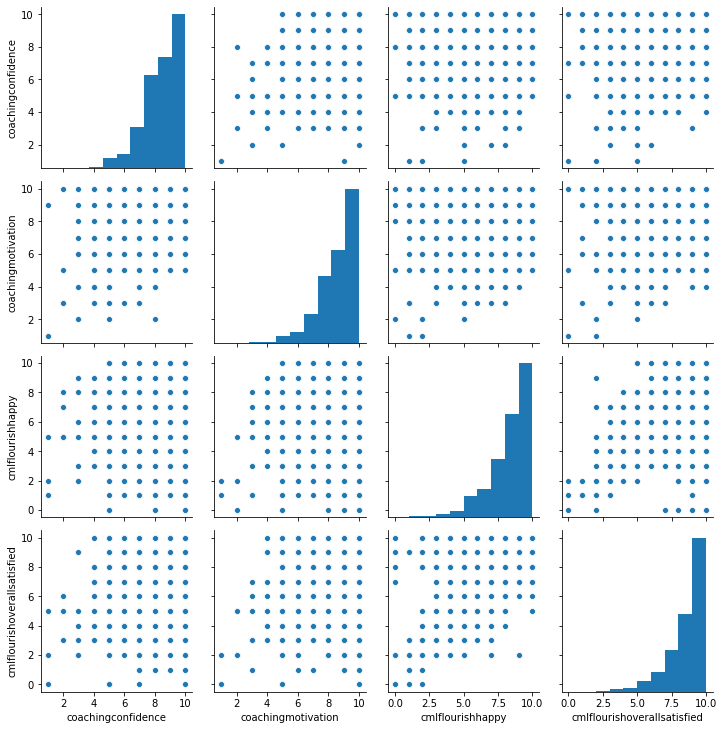

In [63]:
sns.pairplot(small_survey)

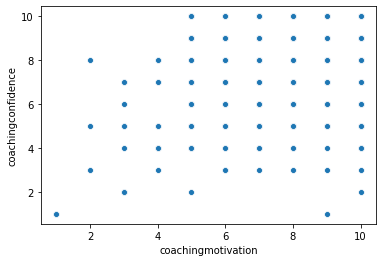

In [64]:
sns.scatterplot(x='coachingmotivation', y='coachingconfidence', data=small_survey)

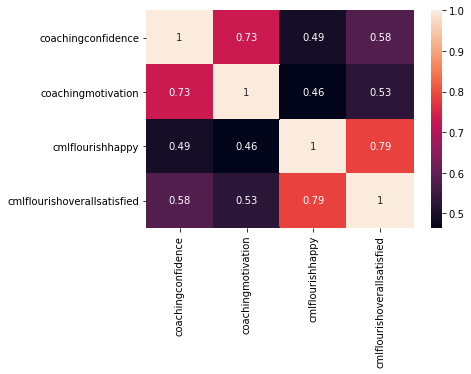

In [65]:

correlation_mat = small_survey.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

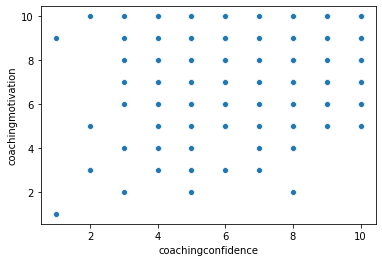

In [66]:
sns.scatterplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

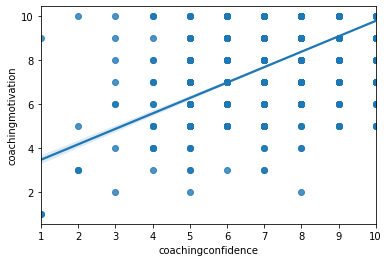

In [67]:
sns.regplot(x='coachingconfidence', y='coachingmotivation', data=small_survey)

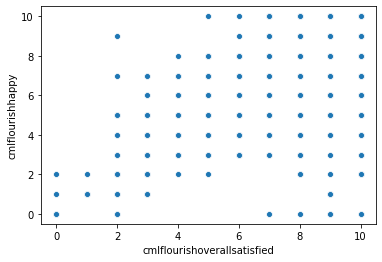

In [68]:
sns.scatterplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

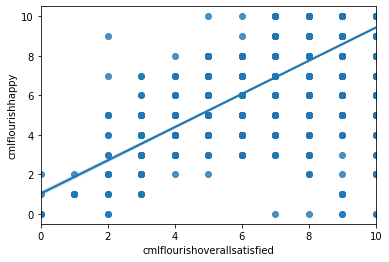

In [69]:
sns.regplot(x='cmlflourishoverallsatisfied', y='cmlflourishhappy', data=small_survey)

In [70]:
X= small_survey[['coachingconfidence']]
y= small_survey[['coachingmotivation']]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(2323, 1) (2323, 1)
(4719, 1) (4719, 1)


In [72]:
model = linear_model.LinearRegression(normalize=True)

In [73]:
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [74]:
print(model.score(X_train, y_train))

0.5175575763776115


In [75]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'predicted motivation score')

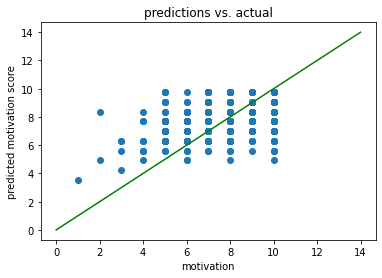

In [76]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.title("predictions vs. actual")
plt.xlabel('motivation')
plt.ylabel('predicted motivation score')

In [77]:
#Multiple Linear Regression using OLS
X = small_survey.drop(["coachingmotivation"],axis=1)
X = sm.add_constant(X)

In [78]:
y= small_survey[['coachingmotivation']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)

In [80]:
multiple_variables = sm.OLS(y_train, X_train)
mv_results = multiple_variables.fit()

In [81]:
mv_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     coachingmotivation   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     906.1
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:05:54   Log-Likelihood:                -2982.1
No. Observations:                2323   AIC:                             5972.
Df Residuals:                    2319   BIC:                             5995.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.4698      0.125     19.773      0.000       2.225       2.715
coachingconfidence              0.5928      0.017     35.736      0.000       0.560       0.625
cmlflourishhappy                0.0726      0.018      4.001      0.000       0.037       0.108
cmlflourishoverallsatisfied     0.0799      0.021      3.893      0.000       0.040       0.120
==============================================================================
Omnibus:                      235.794   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1364.510
Skew:                          -0.286   Prob(JB):                    5.02e-297
Kurtosis:                       6.711   Cond. No.                         101.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
y_pred = mv_results.predict(X_test)

Text(0, 0.5, 'Predicted')

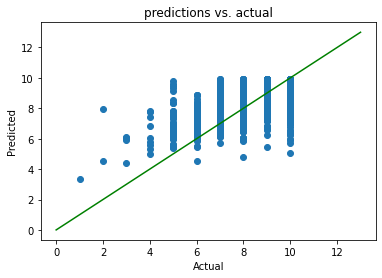

In [83]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,14)],[x for x in range(0,14)], color='green')
plt.title("predictions vs. actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [84]:
X= small_survey[['cmlflourishoverallsatisfied']]
y= small_survey[['cmlflourishhappy']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.67, random_state= 123)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(2323, 1) (2323, 1)
(4719, 1) (4719, 1)


In [85]:
model2 = linear_model.LinearRegression(normalize=True)

In [86]:
model2.fit(X_train, y_train)

LinearRegression(normalize=True)

In [87]:
print(model2.score(X_train, y_train))

0.631958745525008


In [88]:
y_pred = model2.predict(X_test)

Text(0.5, 1.0, 'predictions vs. actual')

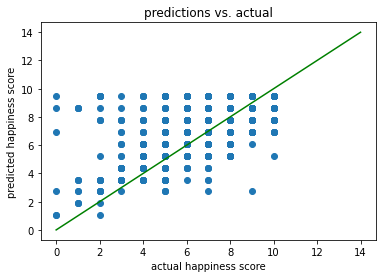

In [89]:
plt.scatter(y_test, y_pred)
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='green')
plt.xlabel('actual happiness score')
plt.ylabel('predicted happiness score')
plt.title("predictions vs. actual")


In [90]:
alignment = survey [['coachinghabitsgoalsalignment','coachingmotivation', 'coachingconfidence' ]]

In [91]:
alignment.corr()

,coachingmotivation,coachingconfidence
coachingmotivation,1.000000,0.730983
coachingconfidence,0.730983,1.000000


In [92]:
#creating baseline measurement using the training model 
y_pred = y_train.mean()
y_pred

cmlflourishhappy    7.996987
dtype: float64

In [93]:
#prediction for training baseline data 
y_pred2= [y_pred] * len(y_train)
y_pred2

[cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishhappy    7.996987
 dtype: float64,
 cmlflourishh

In [94]:
#error for training baseline data
mean_abs_error = mean_absolute_error(y_train, y_pred2)
mean_abs_error

1.2224006356914117

In [95]:
#mean squared error for training baseline data 
mean_sqr= mean_squared_error(y_train, y_pred2)
mean_sqr

2.72706797528468

In [96]:
#creating baseline measurement using the testing model
y_pred = y_test.mean()
y_pred

cmlflourishhappy    7.946175
dtype: float64

In [97]:
#prediction for test baseline data 
y_pred3= [y_pred] * len(y_test)
y_pred3

[cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishhappy    7.946175
 dtype: float64,
 cmlflourishh

In [98]:
#error for test baseline data
mae = mean_absolute_error(y_test, y_pred3)
mae

1.267583431485645

In [99]:
#mean squared error for test baseline data 
mse= mean_squared_error(y_test, y_pred3)
mse

2.8277873404152083

In [100]:
programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   External Participant Id     2907 non-null   object
 1   Goal Record ID              2922 non-null   object
 2   Overall Goal Status         2922 non-null   object
 3   Total Engagement            2922 non-null   int64 
 4   Total Received Engagements  2922 non-null   int64 
 5   Program: Program Name       2922 non-null   object
 6   Start Date                  2922 non-null   object
 7   Coach Mentor                2283 non-null   object
dtypes: int64(2), object(6)
memory usage: 182.8+ KB


In [101]:
programs.head()

,External Participant Id,Goal Record ID,Overall Goal Status,Total Engagement,Total Received Engagements,Program: Program Name,Start Date,Coach Mentor
0,dc5898f5-cec4-40a4-a70f-150590bdbfaf,20210405-2071006,Partially Complete,5,2,ABB 2021,4/5/21,Coach Christine T.
1,80e4b9b6-ea73-40ed-8984-a19c3df348de,20210317-2062241,Dismissed,1,0,ABB 2021,3/17/21,Coach Karl M.
2,3fbf7076-a235-495f-9542-0f3b26f81482,20210326-2065731,Partially Complete,5,3,ABB 2021,3/26/21,Coach Ramona F.
3,38baff43-13bf-49e6-a003-861c3c9336e5,20210112-2016883,Dismissed,1,0,ABB 2021,1/12/21,Coach Karl M.
4,141749cb-3782-4e22-9649-e691c94023b6,20210323-2064436,In Progress,5,4,ABB 2021,3/23/21,Coach Ramona F.


In [102]:
programs.columns = programs.columns.str.lower()
programs.columns = programs.columns.str.replace(" ","_")

In [103]:
program_name = pd.merge(survey, programs)

In [104]:
program_name.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,lastconfidence,lastmotivation,completion_time,goal_record_id,overall_goal_status,total_engagement,total_received_engagements,program:_program_name,start_date,coach_mentor
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,8.0,8.0,00:02:18,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,...,6.0,7.0,00:01:16,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-01 12:25:31,2021-03-01 12:26:52,7.0,...,7.0,8.0,00:01:21,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-06 03:28:09,2021-03-06 03:30:02,7.0,...,7.0,6.0,00:01:53,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,NaN,2021-03-18 19:34:26,2021-03-18 19:35:54,9.0,...,9.0,8.0,00:01:28,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.


In [105]:
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 0 to 7124
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     7125 non-null   int64          
 1   survey_title                  7125 non-null   object         
 2   status                        7125 non-null   int64          
 3   publish_id                    7125 non-null   int64          
 4   contact_id                    7125 non-null   object         
 5   external_participant_id       6990 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         7125 non-null   datetime64[ns] 
 8   end_date_time_stamp           7125 non-null   datetime64[ns] 
 9   coachingconfidence            7125 non-null   float64        
 10  coachingmotivation            7125 non-null   float64        
 11  cmlflourishoveral

In [106]:
program_name['status'].value_counts()

1    7125
Name: status, dtype: int64

In [107]:
program_name = program_name.drop(program_name[program_name.status == 'Incomplete'].index)

/Users/danielle.arneson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [108]:
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 0 to 7124
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     7125 non-null   int64          
 1   survey_title                  7125 non-null   object         
 2   status                        7125 non-null   int64          
 3   publish_id                    7125 non-null   int64          
 4   contact_id                    7125 non-null   object         
 5   external_participant_id       6990 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         7125 non-null   datetime64[ns] 
 8   end_date_time_stamp           7125 non-null   datetime64[ns] 
 9   coachingconfidence            7125 non-null   float64        
 10  coachingmotivation            7125 non-null   float64        
 11  cmlflourishoveral

In [109]:
#cleaning joined dataset 
program_name.columns = program_name.columns.str.lower()
program_name.columns = program_name.columns.str.replace(" ","_")
program_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7125 entries, 0 to 7124
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   survey_id                     7125 non-null   int64          
 1   survey_title                  7125 non-null   object         
 2   status                        7125 non-null   int64          
 3   publish_id                    7125 non-null   int64          
 4   contact_id                    7125 non-null   object         
 5   external_participant_id       6990 non-null   object         
 6   employer_id                   1855 non-null   object         
 7   start_date_time_stamp         7125 non-null   datetime64[ns] 
 8   end_date_time_stamp           7125 non-null   datetime64[ns] 
 9   coachingconfidence            7125 non-null   float64        
 10  coachingmotivation            7125 non-null   float64        
 11  cmlflourishoveral

In [110]:
program_name.head()

,survey_id,survey_title,status,publish_id,contact_id,external_participant_id,employer_id,start_date_time_stamp,end_date_time_stamp,coachingconfidence,...,lastconfidence,lastmotivation,completion_time,goal_record_id,overall_goal_status,total_engagement,total_received_engagements,program:_program_name,start_date,coach_mentor
0,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-01-28 20:17:12,2021-01-28 20:19:30,8.0,...,8.0,8.0,00:02:18,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
1,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-02-05 20:28:12,2021-02-05 20:29:28,6.0,...,6.0,7.0,00:01:16,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
2,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-01 12:25:31,2021-03-01 12:26:52,7.0,...,7.0,8.0,00:01:21,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
3,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,CCHMC,2021-03-06 03:28:09,2021-03-06 03:30:02,7.0,...,7.0,6.0,00:01:53,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.
4,1616,1:1 Coaching survey,1,1616,00339000028TDBRAA4,b6b0fa9b-2222-4dfb-8c88-7f0c0efc9863,NaN,2021-03-18 19:34:26,2021-03-18 19:35:54,9.0,...,9.0,8.0,00:01:28,20210116-2022852,Complete,6,6,CCHMC 2020,1/16/21,Coach Jaxon S.


In [111]:
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Danielle A.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Jennifer F.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Janssen J.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Group Coach Mentor'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Coach Morgan T.'].index)
program_name = program_name.drop(program_name[program_name.coach_mentor == 'Other'].index)

In [112]:
program_name['coach_mentor'].value_counts()

Coach Karl M.          842
Coach Jaxon S.         825
Coach Ramona F.        762
Coach Kenzie B.        748
Coach Christine T.     673
Coach Ari. D           502
Coach Briana W.        472
Coach Elyse D.         419
Coach Atalie F.        394
Coach Jyotica B.       312
Coach Sean M.          292
Coach Maya M.          132
Coach Erika K.         117
Coach Marigloria C.     90
Coach Yana E.           70
Coach Maia K.           11
Coach Danielle D.        9
Name: coach_mentor, dtype: int64

In [113]:
program_name.columns

Index(['survey_id', 'survey_title', 'status', 'publish_id', 'contact_id',
       'external_participant_id', 'employer_id', 'start_date_time_stamp',
       'end_date_time_stamp', 'coachingconfidence', 'coachingmotivation',
       'cmlflourishoverallsatisfied', 'cmlflourishhappy',
       'coachinghabitsgoalsalignment', 'coachingsatisfaction',
       'coachingfeedback', 'confidencedifference', 'motivationdifference',
       'lastconfidence', 'lastmotivation', 'completion_time', 'goal_record_id',
       'overall_goal_status', 'total_engagement', 'total_received_engagements',
       'program:_program_name', 'start_date', 'coach_mentor'],
      dtype='object')

In [114]:
program_name['program:_program_name'].unique()

array(['CCHMC 2020', 'TeamHealth 2021', 'Allegion 2021',
       'Southeastern Grocers 2021', 'Pingry School 2020/2021',
       'Vericast 2021', 'Dawn Foods 2021', 'Sprouts 2020',
       'Assurant 2021', 'McCain Foods 2021', 'APS 2021',
       'Ensemble Health (BSMH) 2021a', 'RaceTrac 2021', 'Suddath 2021',
       'BeWellWithinA 2021a', 'American Airlines 2020', 'BIC 2021',
       'Levi Strauss & Co. 2021', 'PSE 2021', 'ABB 2021',
       'Casey Family Programs 2021', 'TAI Wellness 2021',
       'LG&E and KU 2021', 'Honda 2021', 'UNC-HCS 2021',
       'Kindred Healthcare 2021', 'Kindred At Home 2021', 'EMC 2021',
       'Suddath 2018-19', 'Iowa Clinic 2021', 'BPM 2021', 'Maximus 2021',
       'Bayer 2021', 'NWM 2021', 'Board of Pensions 2021', 'Stryker 2015',
       'Stryker 2021', 'AWC 2021', 'Lehigh University 2020/2021',
       'Ally Financial 2020', 'Landstar 2021', 'BeWellWithinA 2020',
       'LA Care 2021', 'CBHA 2020/2021', 'Nu Skin 2021', 'CCMC 2020',
       'Synopsys 2020', 'Ba

In [115]:
program_name['program:_program_name'].value_counts()

CCHMC 2020                     642
Kindred Healthcare 2021        479
BeWellWithinA 2021a            413
Dover 2021                     323
Assurant 2021                  313
                              ... 
Redwood 2021                     2
INEOS 2021                       2
Ensemble Health (BSMH) 2020      2
Vinson & Elkins 2021             1
ASICS 2020/2021                  1
Name: program:_program_name, Length: 104, dtype: int64

In [116]:
program_name['coachinghabitsgoalsalignment'].unique()

array(['strongly_agree', 'neutral', 'agree', 'disagree',
       'strongly_disagree'], dtype=object)

In [117]:
program_name['coachinghabitsgoalsalignment'].replace('strongly_disagree','1',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('disagree','2',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('neutral','3',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('agree','4',inplace=True)
program_name['coachinghabitsgoalsalignment'].replace('strongly_agree','5',inplace=True)
program_name['coachinghabitsgoalsalignment'].unique()

array(['5', '3', '4', '2', '1'], dtype=object)

In [118]:
program_name['coachingsatisfaction'].replace('very_dissatisfied','1',inplace=True)
program_name['coachingsatisfaction'].replace('dissatisfied','2',inplace=True)
program_name['coachingsatisfaction'].replace('neutral','3',inplace=True)
program_name['coachingsatisfaction'].replace('satisfied','4',inplace=True)
program_name['coachingsatisfaction'].replace('very_satisfied','5',inplace=True)
program_name['coachingsatisfaction'].unique()

array(['5', '4', '3', '1', '2'], dtype=object)

In [180]:
active_programs = program_name.groupby(['program:_program_name']).mean()
active_programs.head(50)

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,lastconfidence,lastmotivation,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,,,
ABB 2021,1616.0,1.0,1616.0,8.917197,8.866242,8.547771,8.394904,0.000000,0.040650,8.917197,8.866242,5.337580,4.146497
APS 2021,1616.0,1.0,1616.0,9.045977,8.919540,8.678161,8.689655,-0.080000,-0.026667,9.045977,8.919540,4.678161,3.574713
ASICS 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,7.000000,6.000000,NaN,NaN,10.000000,10.000000,2.000000,1.000000
AWC 2021,1616.0,1.0,1616.0,8.562500,8.468750,8.281250,8.156250,-0.200000,0.000000,8.562500,8.468750,5.625000,3.687500
Akin Gump 2021,1616.0,1.0,1616.0,9.272727,9.272727,9.727273,9.727273,0.333333,0.111111,9.272727,9.272727,6.000000,5.545455
Akron Children's Hospital 2021,1616.0,1.0,1616.0,8.096386,8.433735,7.096386,6.795181,-0.253731,-0.059701,8.096386,8.433735,3.795181,3.012048
Allegion 2021,1616.0,1.0,1616.0,9.018868,8.886792,8.163522,7.742138,0.007752,0.000000,9.018868,8.886792,5.308176,4.641509
Ally Financial 2020,1616.0,1.0,1616.0,8.746479,8.957746,8.197183,7.788732,0.000000,0.018182,8.746479,8.957746,4.408451,3.309859
Amedisys 2021,1616.0,1.0,1616.0,8.612903,8.526882,7.881720,7.731183,0.101449,0.028986,8.612903,8.526882,4.784946,3.301075


In [120]:
active_programs.columns

Index(['survey_id', 'status', 'publish_id', 'coachingconfidence',
       'coachingmotivation', 'cmlflourishoverallsatisfied', 'cmlflourishhappy',
       'confidencedifference', 'motivationdifference', 'lastconfidence',
       'lastmotivation', 'total_engagement', 'total_received_engagements'],
      dtype='object')

In [121]:
#programs with highest average confidence score 
confidence = active_programs.sort_values(by=['coachingconfidence'], ascending=False)
confidence.head(50)

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,lastconfidence,lastmotivation,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,,,
Sage 2021,1616.0,1.0,1616.0,10.000000,9.666667,9.000000,8.333333,0.000000,-0.500000,10.000000,9.666667,0.000000,0.000000
Viasat 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,9.285714,9.285714,0.000000,0.000000,10.000000,10.000000,1.000000,1.000000
MODEC/SOFEC 2021,1616.0,1.0,1616.0,10.000000,9.600000,10.000000,9.800000,0.000000,0.000000,10.000000,9.600000,8.000000,6.000000
CCMC 2021,1616.0,1.0,1616.0,10.000000,10.000000,7.750000,8.750000,0.000000,0.000000,10.000000,10.000000,7.000000,5.000000
NERC 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,10.000000,10.000000,2.500000,2.000000
NERC 2021 Cancelled,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000
Redwood 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.000000,8.000000,0.000000,0.000000,10.000000,10.000000,2.000000,2.000000
HHP Webb Insurance Agency 2020,1616.0,1.0,1616.0,10.000000,9.166667,10.000000,10.000000,0.000000,0.400000,10.000000,9.166667,4.000000,4.000000
ASICS 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,7.000000,6.000000,NaN,NaN,10.000000,10.000000,2.000000,1.000000


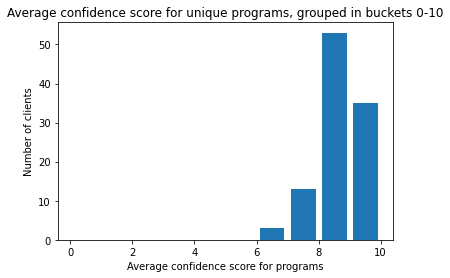

In [122]:
cc= confidence['coachingconfidence']
bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(cc, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Average confidence score for programs')
plt.ylabel('Number of clients')
plt.title('Average confidence score for unique programs, grouped in buckets 0-10')
plt.show()

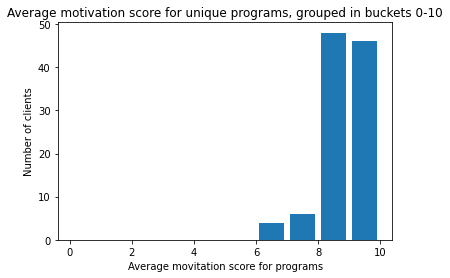

In [123]:
cm= confidence['coachingmotivation']
bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.hist(cm, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Average movitation score for programs')
plt.ylabel('Number of clients')
plt.title('Average motivation score for unique programs, grouped in buckets 0-10')
plt.show()

In [124]:
top_clients = active_programs.sort_values(by=['total_engagement'], ascending=False)
top_clients.head(50)

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,lastconfidence,lastmotivation,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,,,
MODEC/SOFEC 2021,1616.0,1.0,1616.0,10.000000,9.600000,10.000000,9.800000,0.000000,0.000000,10.000000,9.600000,8.000000,6.000000
CCMC 2020,1616.0,1.0,1616.0,6.318182,6.409091,5.954545,5.772727,-0.095238,-0.095238,6.318182,6.409091,7.333333,6.000000
CME Group 2020/2021,1616.0,1.0,1616.0,7.375000,7.750000,7.250000,8.000000,0.166667,-0.333333,7.375000,7.750000,7.125000,2.750000
CCMC 2021,1616.0,1.0,1616.0,10.000000,10.000000,7.750000,8.750000,0.000000,0.000000,10.000000,10.000000,7.000000,5.000000
Lehigh University 2020/2021,1616.0,1.0,1616.0,8.564103,8.692308,8.205128,7.820513,0.000000,-0.031250,8.564103,8.692308,6.282051,2.974359
Landstar 2021,1616.0,1.0,1616.0,9.000000,9.088889,8.533333,8.288889,-0.076923,0.000000,9.000000,9.088889,6.266667,5.000000
Akin Gump 2021,1616.0,1.0,1616.0,9.272727,9.272727,9.727273,9.727273,0.333333,0.111111,9.272727,9.272727,6.000000,5.545455
EAM DFYF 2020,1616.0,1.0,1616.0,9.250000,9.750000,9.000000,8.875000,0.000000,0.000000,9.250000,9.750000,6.000000,5.000000
PODS 2021,1616.0,1.0,1616.0,8.705882,8.529412,8.058824,7.352941,0.000000,0.071429,8.705882,8.529412,5.941176,5.529412


In [125]:
top_clients=top_clients.head(10)
top_clients.reset_index()
top_clients.columns

Index(['survey_id', 'status', 'publish_id', 'coachingconfidence',
       'coachingmotivation', 'cmlflourishoverallsatisfied', 'cmlflourishhappy',
       'confidencedifference', 'motivationdifference', 'lastconfidence',
       'lastmotivation', 'total_engagement', 'total_received_engagements'],
      dtype='object')

In [126]:
confidence_count = confidence.groupby('coachingconfidence').count()
confidence_count.head(50)
                    

,survey_id,status,publish_id,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,lastconfidence,lastmotivation,total_engagement,total_received_engagements
coachingconfidence,,,,,,,,,,,,
6.200000,1,1,1,1,1,1,1,1,1,1,1,1
6.318182,1,1,1,1,1,1,1,1,1,1,1,1
6.666667,1,1,1,1,1,1,1,1,1,1,1,1
7.000000,2,2,2,2,2,2,2,2,2,2,2,2
7.142857,1,1,1,1,1,1,1,1,1,1,1,1
7.333333,1,1,1,1,1,1,1,1,1,1,1,1
7.375000,1,1,1,1,1,1,1,1,1,1,1,1
7.571429,1,1,1,1,1,1,1,1,1,1,1,1
7.600000,1,1,1,1,1,1,1,1,1,1,1,1


In [127]:
#progams will hightest average motivation
motivation = active_programs.sort_values(by=['coachingmotivation'], ascending=False)
motivation.head(50)

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,lastconfidence,lastmotivation,total_engagement,total_received_engagements
program:_program_name,,,,,,,,,,,,,
MSGCU 2021,1616.0,1.0,1616.0,9.666667,10.000000,9.000000,9.000000,0.000000,0.000000,9.666667,10.000000,1.000000,0.000000
Viasat 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,9.285714,9.285714,0.000000,0.000000,10.000000,10.000000,1.000000,1.000000
Redwood 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.000000,8.000000,0.000000,0.000000,10.000000,10.000000,2.000000,2.000000
NERC 2021 Cancelled,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,10.000000,10.000000,0.000000,0.000000
CCMC 2021,1616.0,1.0,1616.0,10.000000,10.000000,7.750000,8.750000,0.000000,0.000000,10.000000,10.000000,7.000000,5.000000
NERC 2021,1616.0,1.0,1616.0,10.000000,10.000000,8.666667,8.000000,0.000000,0.000000,10.000000,10.000000,2.500000,2.000000
McCain Foods 2021,1616.0,1.0,1616.0,9.916667,10.000000,9.583333,9.166667,0.000000,0.000000,9.916667,10.000000,5.416667,4.750000
Vinson & Elkins 2021,1616.0,1.0,1616.0,9.000000,10.000000,7.000000,8.000000,NaN,NaN,9.000000,10.000000,0.000000,0.000000
ASICS 2020/2021,1616.0,1.0,1616.0,10.000000,10.000000,7.000000,6.000000,NaN,NaN,10.000000,10.000000,2.000000,1.000000


In [128]:
program_name['overall_goal_status'].unique()

array(['Complete', 'No Action', 'Dismissed', 'Partially Complete',
       'In Progress', 'Rollover', 'Registration Phase'], dtype=object)

In [129]:
program_name = program_name.drop(program_name[program_name.overall_goal_status == 'No Action'].index)
program_name = program_name.drop(program_name[program_name.overall_goal_status == 'Registration Phase'].index)

In [130]:
goal_status = program_name.groupby(['overall_goal_status']).mean()
goal_status.head()

,survey_id,status,publish_id,coachingconfidence,coachingmotivation,cmlflourishoverallsatisfied,cmlflourishhappy,confidencedifference,motivationdifference,lastconfidence,lastmotivation,total_engagement,total_received_engagements
overall_goal_status,,,,,,,,,,,,,
Complete,1616.0,1.0,1616.0,8.731786,8.888929,8.270714,8.018214,0.005002,0.005419,8.731786,8.888929,6.610357,6.045714
Dismissed,1616.0,1.0,1616.0,8.787746,8.908096,8.124726,7.864333,0.014337,-0.041219,8.787746,8.908096,3.615974,2.208972
In Progress,1616.0,1.0,1616.0,8.640553,8.840092,8.101843,7.774194,0.002843,-0.005685,8.640553,8.840092,3.499078,2.534101
Partially Complete,1616.0,1.0,1616.0,8.854766,8.910741,8.435703,8.127080,0.000000,0.004073,8.854766,8.910741,3.945537,2.358548
Rollover,1616.0,1.0,1616.0,7.944444,8.055556,7.833333,7.055556,-0.066667,-0.133333,7.944444,8.055556,0.000000,0.000000


In [131]:
goal_status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Complete to Rollover
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   survey_id                    5 non-null      float64
 1   status                       5 non-null      float64
 2   publish_id                   5 non-null      float64
 3   coachingconfidence           5 non-null      float64
 4   coachingmotivation           5 non-null      float64
 5   cmlflourishoverallsatisfied  5 non-null      float64
 6   cmlflourishhappy             5 non-null      float64
 7   confidencedifference         5 non-null      float64
 8   motivationdifference         5 non-null      float64
 9   lastconfidence               5 non-null      float64
 10  lastmotivation               5 non-null      float64
 11  total_engagement             5 non-null      float64
 12  total_received_engagements   5 non-null      float64
dtypes: float64(13)


In [132]:
goal_status.index.names

FrozenList(['overall_goal_status'])

In [133]:
goal_status.reset_index(inplace=True)

In [134]:
print(goal_status.columns.tolist())

['overall_goal_status', 'survey_id', 'status', 'publish_id', 'coachingconfidence', 'coachingmotivation', 'cmlflourishoverallsatisfied', 'cmlflourishhappy', 'confidencedifference', 'motivationdifference', 'lastconfidence', 'lastmotivation', 'total_engagement', 'total_received_engagements']


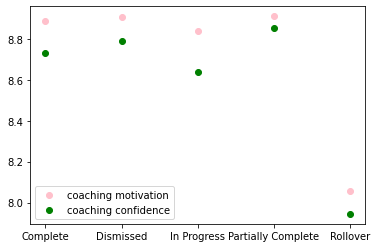

In [135]:
g = goal_status['overall_goal_status']
gc =goal_status['coachingconfidence']
gm= goal_status['coachingmotivation']
plt.scatter(g,gm, color ='pink', label= 'coaching motivation')
plt.scatter(g,gc, color='green', label='coaching confidence')
plt.legend()
plt.show()

In [136]:
alignement= program_name[['coachinghabitsgoalsalignment', 'coachingmotivation', 'coachingconfidence']]
alignment

,coachinghabitsgoalsalignment,coachingmotivation,coachingconfidence
2,strongly_agree,8.0,8.0
3,agree,8.0,8.0
4,strongly_agree,10.0,10.0
5,strongly_agree,10.0,10.0
7,agree,10.0,8.0
...,...,...,...
7660,strongly_agree,8.0,10.0
7662,strongly_agree,8.0,8.0
7663,strongly_agree,10.0,9.0
7664,neutral,6.0,8.0


In [137]:
alignment = alignment.groupby('coachinghabitsgoalsalignment').mean()
alignment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, agree to strongly_disagree
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coachingmotivation  5 non-null      float64
 1   coachingconfidence  5 non-null      float64
dtypes: float64(2)
memory usage: 120.0+ bytes


In [138]:
alignment.index.names

FrozenList(['coachinghabitsgoalsalignment'])

In [139]:
alignment.reset_index(inplace=True)
alignment.index.names

FrozenList([None])

In [140]:
alignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coachinghabitsgoalsalignment  5 non-null      object 
 1   coachingmotivation            5 non-null      float64
 2   coachingconfidence            5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [141]:
alignment=alignment[['coachinghabitsgoalsalignment', 'coachingmotivation', 'coachingconfidence']]
alignment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coachinghabitsgoalsalignment  5 non-null      object 
 1   coachingmotivation            5 non-null      float64
 2   coachingconfidence            5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [142]:
alignment['coachinghabitsgoalsalignment'].replace('strongly_disagree','s_disagree',inplace=True)
alignment['coachinghabitsgoalsalignment'].replace('strongly_agree','s_agree',inplace=True)

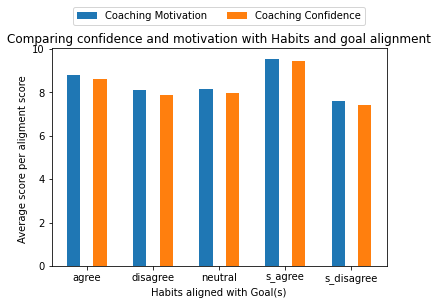

In [143]:
x= alignment['coachingmotivation']
y=alignment['coachingconfidence']
z= alignment['coachinghabitsgoalsalignment']

X_axis = np.arange(len(z))
  
plt.bar(X_axis - 0.2, x, 0.2, label = 'Coaching Motivation')
plt.bar(X_axis + 0.2, y, 0.2, label = 'Coaching Confidence')
  
plt.xticks(X_axis, z)
plt.xlabel("Habits aligned with Goal(s)")
plt.ylabel("Average score per aligment score ")
plt.title("Comparing confidence and motivation with Habits and goal alignment")
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.show()

In [144]:
coaches = program_name[['coachinghabitsgoalsalignment', 'coachingmotivation', 'coachingconfidence','coach_mentor','confidencedifference', 'motivationdifference']]

In [145]:
coaches['coachinghabitsgoalsalignment'].replace('strongly_disagree','1',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('disagree','2',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('neutral','3',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('agree','4',inplace=True)
coaches['coachinghabitsgoalsalignment'].replace('strongly_agree','5',inplace=True)
coaches['coachinghabitsgoalsalignment'].unique()

/Users/danielle.arneson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array(['5', '3', '4', '2', '1'], dtype=object)

In [146]:
hga = coaches.groupby('coach_mentor').mean()
hga

,coachingmotivation,coachingconfidence,confidencedifference,motivationdifference
coach_mentor,,,,
Coach Ari. D,8.929006,8.780933,0.005305,0.031830
Coach Atalie F.,8.879896,8.603133,0.055738,0.009836
Coach Briana W.,8.980932,8.966102,-0.010554,-0.079156
Coach Christine T.,9.004478,8.822388,-0.014898,-0.016760
Coach Danielle D.,9.000000,7.888889,NaN,NaN
Coach Elyse D.,9.035800,8.954654,0.023739,0.032641
Coach Erika K.,9.205128,9.008547,0.010638,-0.053191
Coach Jaxon S.,8.841657,8.722290,0.015480,-0.021672
Coach Jyotica B.,8.753205,8.602564,0.025210,-0.008403


In [147]:
f= pd.read_csv('/Users/danielle.arneson/Desktop/flourishing.csv')
f.head()

,survey_id,survey_name,survey_type,aid,client_sk,client_id,client_name,program_sk,program_name,program_id,question_id,question_text,response_id,survey_user_progress_id,survey_complete_date,response_created_date,answer_id,open_text,question_complete_count,flourishing_paired_benchmark_prior4_comp_qtr
0,568,Find Your Flourishing Score,FLOURING_INDEX,57bdbf69-526a-41bd-bd7a-349521842368,1068778,0017000001Ck9aaAAB,Busey Bank,490,Busey Bank 2019,a0q39000008d7zfAAA,523,I never worry about being able to meet normal ...,20651074,1761841,2019-09-11 18:34:58,2019-09-11 18:33:27,4,NaN,12,7.759
1,714,Find Your Flourishing Score,FLOURING_INDEX,e5736ed0-e0fb-48ac-aa46-ee38d1ccf571,1065718,0017000001ARtNOAA1,Columbia Basin Health Association,800,CBHA 2019-2020,a0q39000008dLiwAAE,523,I never worry about being able to meet normal ...,25942484,2327580,2020-03-04 23:35:23,2020-03-04 23:34:03,10,NaN,12,7.759
2,714,Find Your Flourishing Score,FLOURING_INDEX,9111d452-4725-493a-b437-3fd175c4c8e5,1068821,0017000001BrwkAAAR,BeWellWithinA,9131,BeWellWithinA 2020,a0q1O00000A8nycQAB,523,I never worry about being able to meet normal ...,26235733,2361126,2020-03-10 19:38:58,2020-03-10 19:38:00,3,NaN,12,7.759
3,787,Find Your Flourishing Score,FLOURING_INDEX,e5736ed0-e0fb-48ac-aa46-ee38d1ccf571,1065718,0017000001ARtNOAA1,Columbia Basin Health Association,14755,CBHA 2020/2021,a0q1O00000ANXwfQAH,523,I never worry about being able to meet normal ...,28537846,2598706,2020-05-29 17:00:34,2020-05-29 16:58:24,8,NaN,12,7.759
4,787,Find Your Flourishing Score,FLOURING_INDEX,36a2174a-71b1-4f30-919c-361d72fdd8ea,1068885,0013900001X2oGIAAZ,Pullman Regional Hospital,16055,Pullman Regional Hospital 2020,a0q1O00000A9MGqQAN,523,I never worry about being able to meet normal ...,28883915,2634861,2020-06-17 22:16:53,2020-06-17 22:15:33,8,NaN,12,7.759


In [148]:
f['question_text'].unique()

array(['I never worry about being able to meet normal monthly living expenses.',
       'I am always able to give up some happiness now for greater happiness later.',
       'I always act to promote good in all circumstances, even in difficult and challenging situations.',
       'I am content with my friendships and relationships.',
       'How would you rate your overall mental health?',
       'In general, how would you rate your physical health?',
       'My relationships are as satisfying as I would want them to be.',
       'I understand my purpose in life.',
       'I never worry about safety, food, or housing.',
       'Overall, how satisfied are you with life as a whole these days?',
       'In general, how happy or unhappy do you usually feel?',
       'Overall, to what extent do you feel the things you do in your life are worthwhile?'],
      dtype=object)

In [149]:
f = f.drop(f[f.question_text == 'I never worry about being able to meet normal monthly living expenses.'].index)
f = f.drop(f[f.question_text == 'I am always able to give up some happiness now for greater happiness later.'].index)
f = f.drop(f[f.question_text == 'I always act to promote good in all circumstances, even in difficult and challenging situations.'].index)
f = f.drop(f[f.question_text == 'In general, how would you rate your physical health?'].index)
f = f.drop(f[f.question_text == 'How would you rate your overall mental health?'].index)
f = f.drop(f[f.question_text == 'My relationships are as satisfying as I would want them to be.'].index)
f = f.drop(f[f.question_text == 'I understand my purpose in life.'].index)
f = f.drop(f[f.question_text == 'I never worry about safety, food, or housing.'].index)
f = f.drop(f[f.question_text == 'I am content with my friendships and relationships.'].index)
f = f.drop(f[f.question_text == 'Overall, to what extent do you feel the things you do in your life are worthwhile?'].index)

In [150]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65732 entries, 292616 to 361525
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   survey_id                                     65732 non-null  int64  
 1   survey_name                                   65732 non-null  object 
 2   survey_type                                   65732 non-null  object 
 3   aid                                           65732 non-null  object 
 4   client_sk                                     65732 non-null  int64  
 5   client_id                                     65732 non-null  object 
 6   client_name                                   65732 non-null  object 
 7   program_sk                                    65732 non-null  int64  
 8   program_name                                  65732 non-null  object 
 9   program_id                                    65732 non

In [151]:
f['question_text'].unique()

array(['Overall, how satisfied are you with life as a whole these days?',
       'In general, how happy or unhappy do you usually feel?'],
      dtype=object)

In [152]:
f.head()

,survey_id,survey_name,survey_type,aid,client_sk,client_id,client_name,program_sk,program_name,program_id,question_id,question_text,response_id,survey_user_progress_id,survey_complete_date,response_created_date,answer_id,open_text,question_complete_count,flourishing_paired_benchmark_prior4_comp_qtr
292616,1542,Human Performance Assessment,HUMAN_PERFORMANCE_ASSESSMENT,2d48003c-b4c2-454a-bfb3-8ed3c9b0505d,1064638,c9c967ec-0304-4c49-946e-a7df431d5223,ChampionX,16807,Apex,5,3839,"Overall, how satisfied are you with life as a ...",32155271,3009708,2021-01-26 20:06:40,2021-01-26 19:52:58,8,NaN,12,7.7288
292617,714,Find Your Flourishing Score,FLOURING_INDEX,104cd913-c771-4d82-86cd-fcc32b67fda8,1068885,0013900001X2oGIAAZ,Pullman Regional Hospital,16055,Pullman Regional Hospital 2020,a0q1O00000A9MGqQAN,513,"Overall, how satisfied are you with life as a ...",25289374,2209771,2020-02-20 17:20:23,2020-02-20 17:19:17,10,NaN,12,7.7288
292618,1349,Find Your Flourishing Score,FLOURING_INDEX,6d750c3f-c2da-48e9-9806-e65e9e5b5c4c,1068885,0013900001X2oGIAAZ,Pullman Regional Hospital,16055,Pullman Regional Hospital 2020,a0q1O00000A9MGqQAN,2417,"Overall, how satisfied are you with life as a ...",30954925,2876495,2020-11-06 01:07:37,2020-11-06 01:07:37,3,NaN,12,7.7288
292619,568,Find Your Flourishing Score,FLOURING_INDEX,aa0ed5d4-0e92-4085-92aa-e2bb53879258,1068763,00170000018YQ0FAAW,LG&E and KU Services Company,13706,LG&E and KU 2019,a0q39000009MXDTAA4,513,"Overall, how satisfied are you with life as a ...",20572193,1755269,2019-09-10 11:43:43,2019-09-10 11:43:18,6,NaN,12,8.6575
292620,568,Find Your Flourishing Score,FLOURING_INDEX,5d5a767a-d349-4de3-95db-5710739cd7d3,1068763,00170000018YQ0FAAW,LG&E and KU Services Company,13706,LG&E and KU 2019,a0q39000009MXDTAA4,513,"Overall, how satisfied are you with life as a ...",20720127,1767491,2019-09-13 21:20:59,2019-09-13 21:16:50,8,NaN,12,8.6575


In [153]:
f.groupby('aid')

In [154]:
life_sat=f.drop(f[f.question_text == 'In general, how happy or unhappy do you usually feel?'].index)

In [155]:
life_sat['question_text'].unique()

array(['Overall, how satisfied are you with life as a whole these days?'],
      dtype=object)

In [156]:
life_sat.head()

,survey_id,survey_name,survey_type,aid,client_sk,client_id,client_name,program_sk,program_name,program_id,question_id,question_text,response_id,survey_user_progress_id,survey_complete_date,response_created_date,answer_id,open_text,question_complete_count,flourishing_paired_benchmark_prior4_comp_qtr
292616,1542,Human Performance Assessment,HUMAN_PERFORMANCE_ASSESSMENT,2d48003c-b4c2-454a-bfb3-8ed3c9b0505d,1064638,c9c967ec-0304-4c49-946e-a7df431d5223,ChampionX,16807,Apex,5,3839,"Overall, how satisfied are you with life as a ...",32155271,3009708,2021-01-26 20:06:40,2021-01-26 19:52:58,8,NaN,12,7.7288
292617,714,Find Your Flourishing Score,FLOURING_INDEX,104cd913-c771-4d82-86cd-fcc32b67fda8,1068885,0013900001X2oGIAAZ,Pullman Regional Hospital,16055,Pullman Regional Hospital 2020,a0q1O00000A9MGqQAN,513,"Overall, how satisfied are you with life as a ...",25289374,2209771,2020-02-20 17:20:23,2020-02-20 17:19:17,10,NaN,12,7.7288
292618,1349,Find Your Flourishing Score,FLOURING_INDEX,6d750c3f-c2da-48e9-9806-e65e9e5b5c4c,1068885,0013900001X2oGIAAZ,Pullman Regional Hospital,16055,Pullman Regional Hospital 2020,a0q1O00000A9MGqQAN,2417,"Overall, how satisfied are you with life as a ...",30954925,2876495,2020-11-06 01:07:37,2020-11-06 01:07:37,3,NaN,12,7.7288
292619,568,Find Your Flourishing Score,FLOURING_INDEX,aa0ed5d4-0e92-4085-92aa-e2bb53879258,1068763,00170000018YQ0FAAW,LG&E and KU Services Company,13706,LG&E and KU 2019,a0q39000009MXDTAA4,513,"Overall, how satisfied are you with life as a ...",20572193,1755269,2019-09-10 11:43:43,2019-09-10 11:43:18,6,NaN,12,8.6575
292620,568,Find Your Flourishing Score,FLOURING_INDEX,5d5a767a-d349-4de3-95db-5710739cd7d3,1068763,00170000018YQ0FAAW,LG&E and KU Services Company,13706,LG&E and KU 2019,a0q39000009MXDTAA4,513,"Overall, how satisfied are you with life as a ...",20720127,1767491,2019-09-13 21:20:59,2019-09-13 21:16:50,8,NaN,12,8.6575


In [157]:
life_sat['answer_id'].mean()

7.797693665185906

In [158]:
happiness = f.drop(f[f.question_text == 'Overall, how satisfied are you with life as a whole these days?'].index)
happiness['answer_id'].mean()

7.627183107162417